<a href="https://colab.research.google.com/github/HadilGhaith/Prediction-of-Product-Sales/blob/main/copy_of_project_1_part_5__core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
path = '/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Cleaning Data

In [ ]:
# check for duplicated
df.duplicated().sum()

0

In [ ]:
# fix inconsistencies in categorical
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for col in cat_cols:
  print(f'Value counts for {col}\n', df[col].value_counts(), '\n')


Value counts for Item_Identifier
 FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

Value counts for Item_Fat_Content
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Value counts for Item_Type
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Value counts for Outlet_Identifier
 OUT027    935
OUT013    932
OUT049    930
OUT046    

In [ ]:
# fic the inconsistencies in item_fst_content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## preprocessing for machine learning

In [ ]:
# difine target and feature matrix
y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# preprocessing for numeric columns
# define numeric columns
num_cols = X_train.select_dtypes('number').columns
print('Numeric Columns:', num_cols)
# imput mean for item weight
mean_imputer = SimpleImputer(strategy='mean')
# scaleing the numeric columns
num_scaler = StandardScaler()
# numeric pipeline
num_pipe = make_pipeline(mean_imputer, num_scaler)
# num tuple
num_tuple = ("numeric", num_pipe, num_cols)
num_tuple
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# value count
X_train['Outlet_Size'].value_counts()

Medium    2103
Small     1788
High       689
Name: Outlet_Size, dtype: int64

In [ ]:
X_train['Outlet_Location_Type'].value_counts()

Tier 3    2531
Tier 2    2106
Tier 1    1755
Name: Outlet_Location_Type, dtype: int64

In [ ]:
# preprocessing for ordinal featurs
# define ordinal featurs
ord_cols = ['Outlet_Size', 'Outlet_Location_Type']
print('Ordinal Columns:', ord_cols)
# impute the ordinal data
ord_imputer = SimpleImputer(strategy='constant', fill_value= 'Medium')
# ordering for ordinal columns
size_order = ['Small', 'Medium', 'High']
type_order = ['Tier 1', 'Tier 2', 'Tier 3']
ord_order = [size_order, type_order]
ord_encoder = OrdinalEncoder(categories=ord_order)
# scaleing ordinal feature
ord_scaler = StandardScaler()
# pipeline
ord_pipe = make_pipeline(ord_imputer, ord_encoder, ord_scaler)
# ordinal tuple
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_pipe

Ordinal Columns: ['Outlet_Size', 'Outlet_Location_Type']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Medium', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [ ]:
# preprocessing for nominal features
# define nominal columns
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print('Nominal Columns:', ohe_cols)
# one hot encoding for nominal
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# nominal pipeline
ohe_pipe = make_pipeline(ohe_encoder)
# nominal tuple
ohe_tuple = ('Nominal', ohe_pipe, ohe_cols)
ohe_pipe

Nominal Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Instantiate the Column Transformer

In [ ]:
# instantiate
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Medium',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  Ordin...
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('Nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

# fit column transformer on training data

In [ ]:
# fit
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Medium',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  Ordin...
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('Nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

# transform train and testing data

In [ ]:
# transform train data
X_train_tf = col_transformer.transform(X_train)
# transform test data
X_test_tf = col_transformer.transform(X_test)
# check X_train
X_train_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,0.287374,1.084948,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,0.287374,1.084948,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,0.287374,-1.384777,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,-1.384048,-0.149914,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,0.287374,-0.149914,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Project 1 - Part 6 (Core):

> Indented block



## CRISP-DM Phase 4 - Modeling

In [ ]:
# import tools and needed custome function
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

### linear Regression Model

In [ ]:
# instantiate the model
lin_reg = LinearRegression(randome_state=42)
# fit model on training data
lin_reg.fit(X_train_tf, y_train)
# evaluate model
evaluate_regression(lin_reg, X_train_tf, y_train, X_test_tf, y_test, output_frame=True)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.133
- MSE = 1,297,557.888
- RMSE = 1,139.104
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.138
- MSE = 1,194,358.377
- RMSE = 1,092.867
- R^2 = 0.567


,MAE,MSE,RMSE,R^2
Training Data,847.133,1297557.888,1139.104,0.562
Test Data,804.138,1194358.377,1092.867,0.567


- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
- the metrics ain testin and train data are colse to each other.
- based on r2 values the model is underfit since its not perform well on both training and testing data

### Random Forest Model

In [ ]:
# instantiat the model
rf = RandomForestRegressor(random_state=42)
# fit model on training data
rf.fit(X_train_tf, y_train)
# evaluate model
evaluate_regression(rf, X_train_tf, y_train, X_test_tf, y_test, output_frame=True)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.536
- MSE = 182,688.635
- RMSE = 427.421
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 766.767
- MSE = 1,217,003.043
- RMSE = 1,103.179
- R^2 = 0.559


,MAE,MSE,RMSE,R^2
Training Data,296.536,182688.635,427.421,0.938
Test Data,766.767,1217003.043,1103.179,0.559


Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
- r2 value for training data is high and close to indicate the model in over fiting state

Compare this model's performance to the linear regression model: which model has the best test scores?
- random forest has better test score than liner regression

### GridSearchCV Tuning

In [ ]:
# getting parameters for rf
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#define a param grid
param_grid = {'max_depth': [None,10,15,20],
          'n_estimators':[10,100,150,200],
          'min_samples_leaf':[2,3,4],
          'max_features':['sqrt','log2',None],
          'oob_score':[True,False]}

In [ ]:
# instantiat  graidsearch
gridsearch_rf = GridSearchCV(rf, param_grid, n_jobs=-1, verbose=1)
# fit gridsearch on trining data
gridsearch_rf.fit(X_train_tf, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [10, 100, 150, 200],
                         'oob_score': [True, False]},
             verbose=1)

In [ ]:
# obtain the best parameters
gridsearch_rf.best_params_

{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 2,
 'n_estimators': 200,
 'oob_score': True}

In [ ]:
#define and refit best model
best_rf = gridsearch_rf.best_estimator_
# evaluate best mosel
evaluate_regression(best_rf, X_train_tf, y_train, X_test_tf, y_test, output_frame=True)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 646.129
- MSE = 842,001.371
- RMSE = 917.606
- R^2 = 0.715

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 738.895
- MSE = 1,129,658.555
- RMSE = 1,062.854
- R^2 = 0.591


,MAE,MSE,RMSE,R^2
Training Data,646.129,842001.371,917.606,0.715
Test Data,738.895,1129658.555,1062.854,0.591


- Compare your tuned model to your default Random Forest: did the performance improve?
-the r2 for tuned moodel have haighr value in test data than dufalte model so the tunning improve the performance of the model

In [ ]:
# save model
import joblib
# creating a dictionary of all of the variables to save for later
export ={'X_train':X_train_tf,
         'y_train': y_train,
         'X_test':X_test_tf,
          "y_test": y_test,
         'preprocessor':col_transformer,
         'GridSearch':gridsearch_rf}
#saving the export dict as a joblib file--saving to new Models/Autompg folder
joblib.dump(export, '/content/drive/MyDrive/CodingDojo/02-IntroML/Week06/Models/Autompg/dec_project-1_gridsearch.joblib')

['/content/drive/MyDrive/CodingDojo/02-IntroML/Week06/Models/Autompg/dec_project-1_gridsearch.joblib']

# CRISP-DM Phase 5 - Evaluation

- Overall, which model do you recommend?
 I recommend random forest tuned model.
- Justify your recommendation
the tuned random forest improve the r2 in testing data wich will give better prediction for sales

<Axes: >

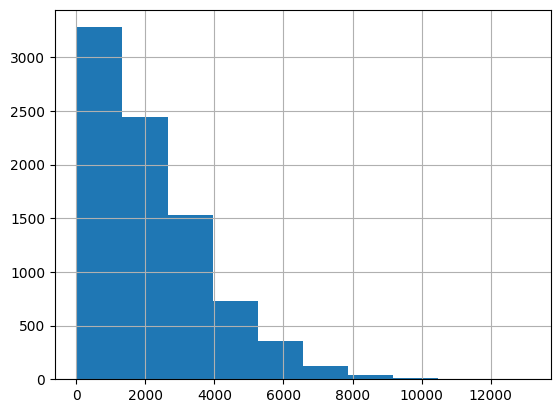

In [ ]:
df['Item_Outlet_Sales'].hist()

In [ ]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 646.129
- MSE = 842,001.371
- RMSE = 917.606
- R^2 = 0.715

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 738.895
- MSE = 1,129,658.555
- RMSE = 1,062.854
- R^2 = 0.591

- based on r2 values our model will predict the the sales of the outlet with an around 60% of varince frm the real sales values.
- based on RMSE values our model predict that the diffrence between the actual values and our prdiction would be in the range of 1000 $.
- its more easy to understand and read.
- its not over fit or under fit since the metrics of the training set and testing set are slighty close to eachother.

In [ ]:
df['Item_Outlet_Sales'].mean()/ 917.606 / 100

0.023771519732597998

In [ ]:
917.606/ df['Item_Outlet_Sales'].mean()

0.42067146368799263

In [ ]:
1062.854 /df['Item_Outlet_Sales'].mean()

0.4872596167272639

In [ ]:
1-((df['Item_Outlet_Sales'].max()-1062.854)/df['Item_Outlet_Sales'].max())

0.08121470610205961

In [ ]:
((df['Item_Outlet_Sales'].median()-1062.854)/df['Item_Outlet_Sales'].median())

0.40766001367640636